In [1]:
using DifferentialEquations
using Plots:plot
import GR

# Lotka Volterra equations
- frequently used to describe the dynamics of biological systems in which two species interact
- one as a predator and the other as prey.

In [2]:
# x' = α*x+β*x*y
# y' = -δ*γ+x*y

In [3]:
function lotka_volterra(du,u,p,t)
  x, y = u
  α, β, δ, γ = p
  du[1] = dx = α*x - β*x*y
  du[2] = dy = -δ*y + γ*x*y
end

lotka_volterra (generic function with 1 method)

In [4]:
u0 = [1.0, 1.0]
tspan = (0.0,10.0)
p = [1.5,1.0,3.0,1.0]

4-element Array{Float64,1}:
 1.5
 1.0
 3.0
 1.0

In [5]:
prob = ODEProblem(lotka_volterra, u0, tspan, p)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: [1.0, 1.0]

In [6]:
@time sol = solve(prob);

 13.001267 seconds (59.50 M allocations: 2.996 GiB, 7.86% gc time)


In [7]:
gr()

UndefVarError: UndefVarError: gr not defined

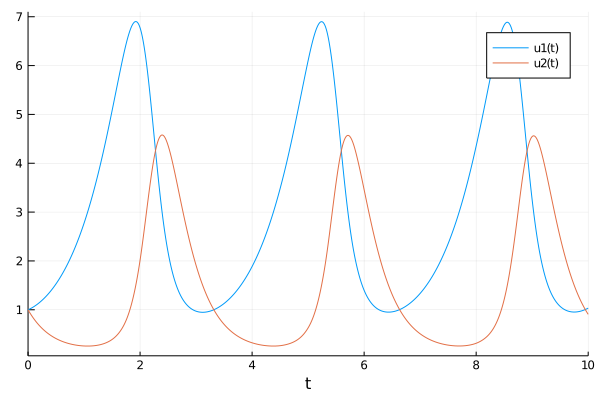

In [8]:
plot(sol)

In [9]:
u0_f(p,t0) = [p[2],p[4]]
tspan_f(p) = (0.0,10*p[4])
p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(lotka_volterra,u0_f,tspan_f,p)

ODEProblem with uType typeof(u0_f) and tType Unknown. In-place: true
timespan: tspan_f
u0: u0_f

In [10]:
@time sol = solve(prob);

  0.038433 seconds (106.56 k allocations: 5.679 MiB)


In [11]:
Plots.plot(sol)

UndefVarError: UndefVarError: Plots not defined

In [12]:
p = [1.5,1.0,3.0,1.0]
prob = ODEProblem(lotka_volterra,u0,tspan,p)
sol = solve(prob,Tsit5(),saveat=0.1)
A = sol[1,:]; # length 101 vector

In [13]:
plot(sol)
t = 0:0.1:10.0
scatter!(t,A)

UndefVarError: UndefVarError: scatter! not defined

In [14]:
using Flux, DiffEqFlux

In [15]:
concrete_solve(prob,Tsit5(),u0,p,saveat=0.1);

In [16]:
p = [2.2, 1.0, 2.0, 0.4] # Initial Parameter Vector
params = Flux.params(p)

Params([[2.2, 1.0, 2.0, 0.4]])

In [17]:
function predict_rd() # Our 1-layer neural network
  concrete_solve(prob,Tsit5(),u0,p,saveat=0.1)[1,:]
end

predict_rd (generic function with 1 method)

In [18]:
loss_rd() = sum(abs2,x-1 for x in predict_rd()) # loss function

loss_rd (generic function with 1 method)

In [19]:
data = Iterators.repeated((), 100)
opt = ADAM(0.1)
cb = function ()
  display(loss_rd())
  display(plot(solve(remake(prob,p=Flux.data(p)),SOSRI(),saveat=0.1),ylim=(0,6)))
end

#5 (generic function with 1 method)

In [24]:
gr()

UndefVarError: UndefVarError: gr not defined

4311.399889162692

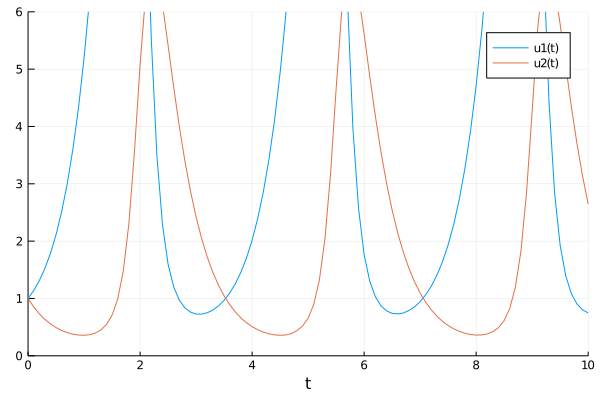

┌ Warning: `data(x)` is deprecated, use `x` instead.
│   caller = (::var"#5#6")() at In[19]:5
└ @ Main ./In[19]:5


In [21]:
# Display the ODE with the initial parameter values.
cb()

1972.501853678255

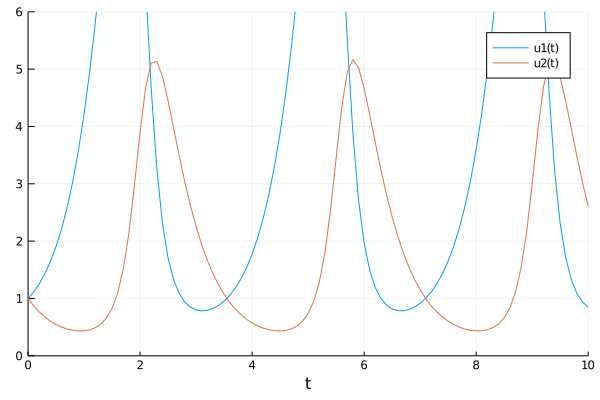

1016.6500715801347

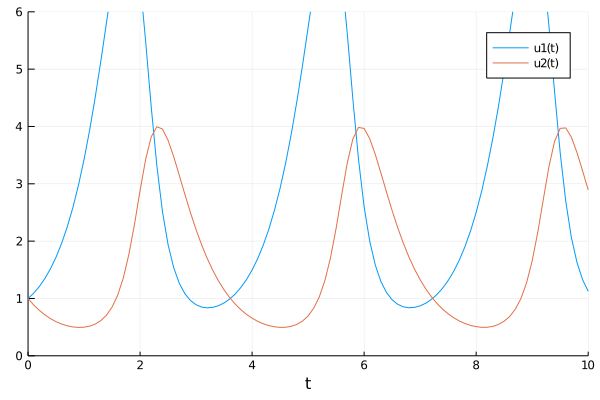

566.9906525323464

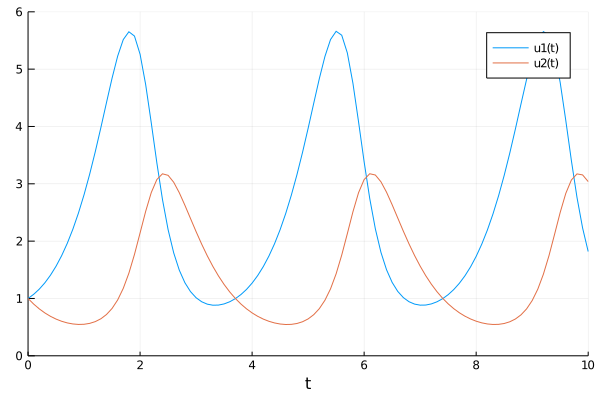

326.1177132142035

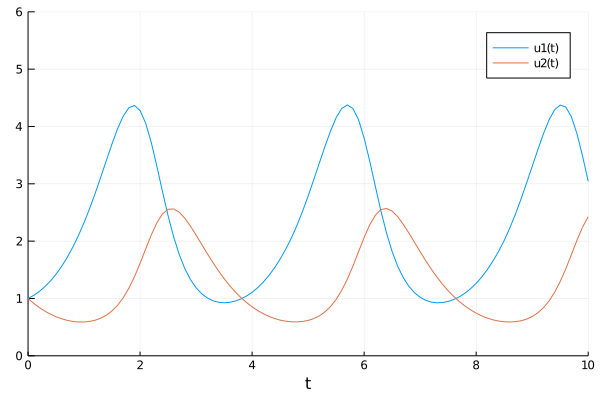

177.12296288013337

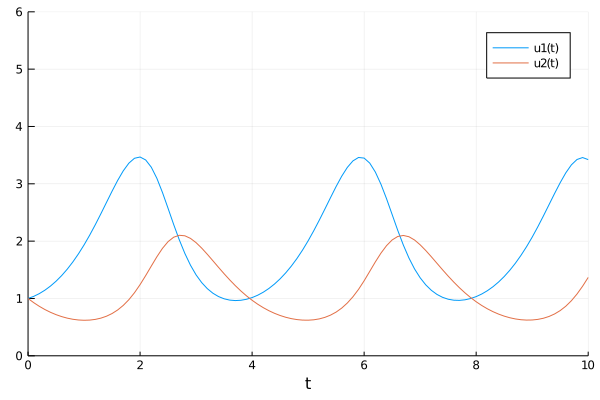

92.15258043763818

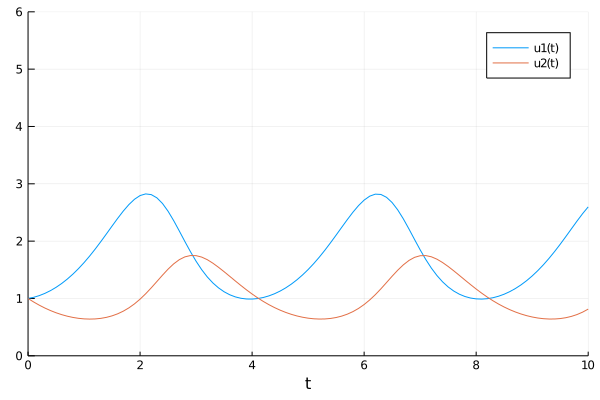

50.70070172639573

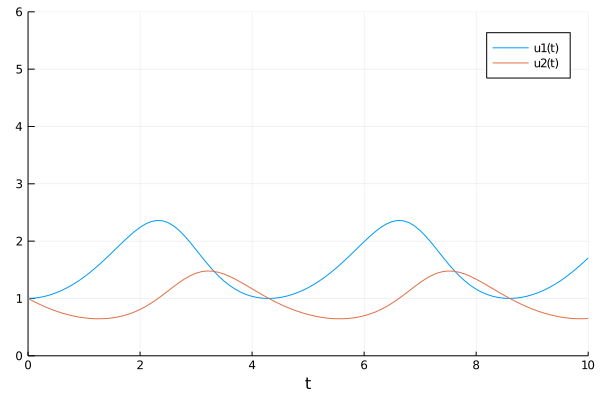

30.614443037740493

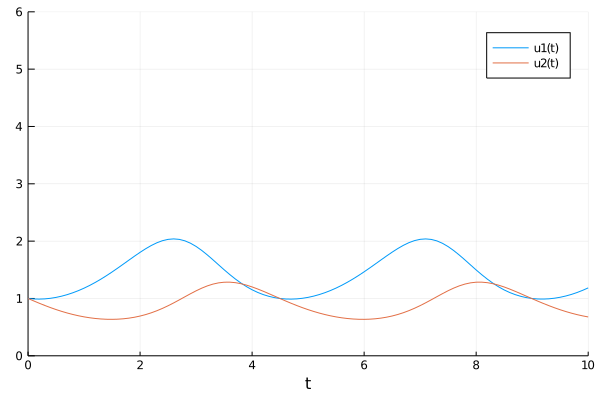

19.73096142723127

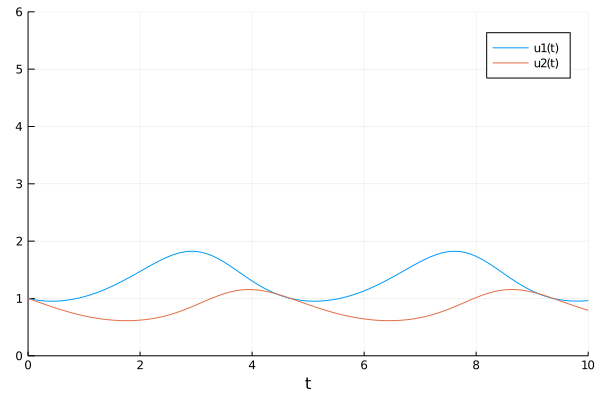

13.627359195278578

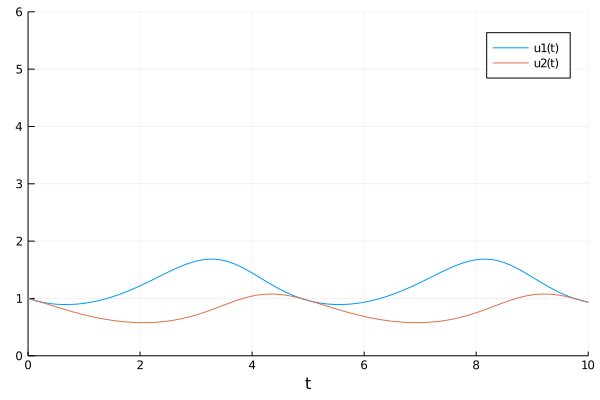

10.475125224697358

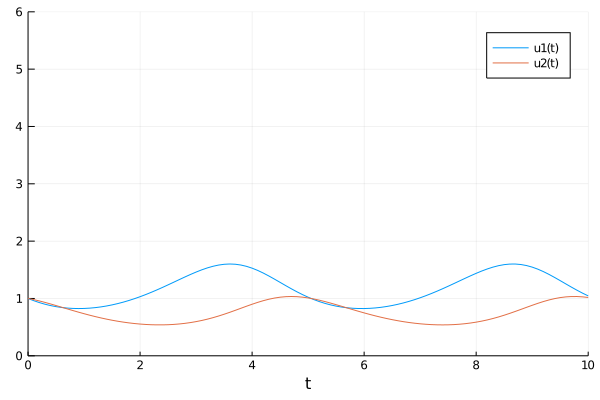

9.106839680433884

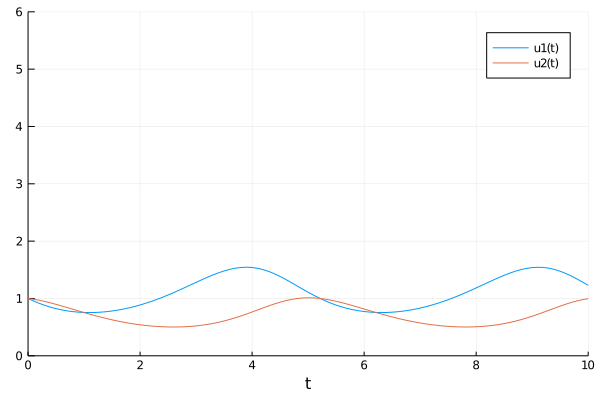

8.663465600477885

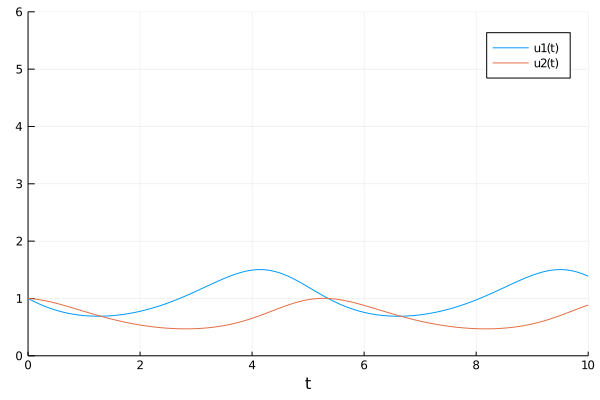

8.714710265914736

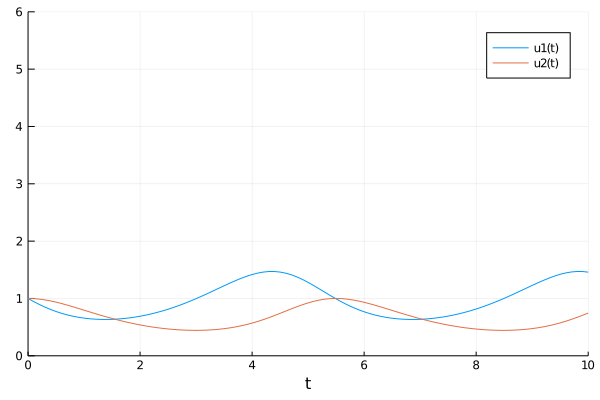

9.209117202568159

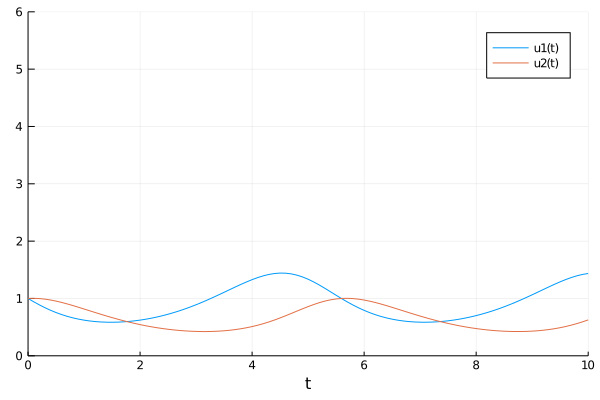

10.11780835570822

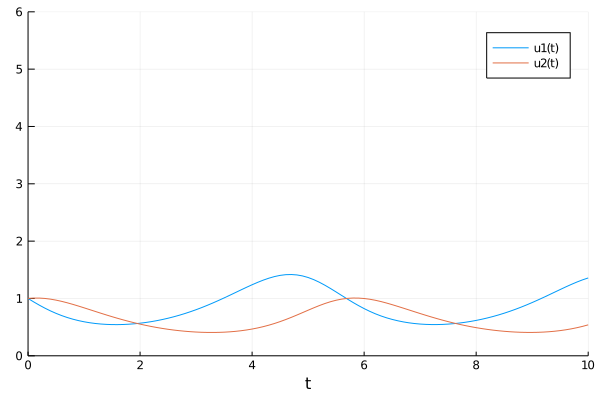

11.31142888602855

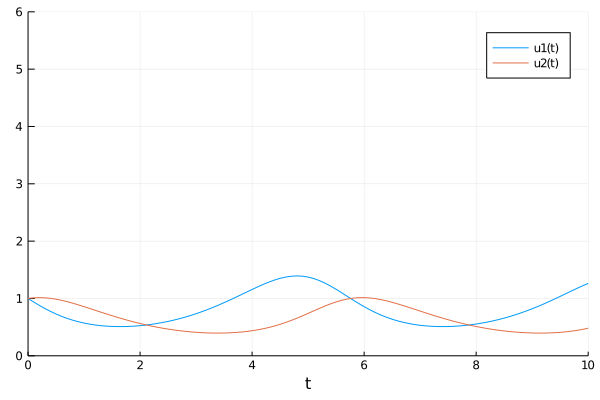

12.566417707577095

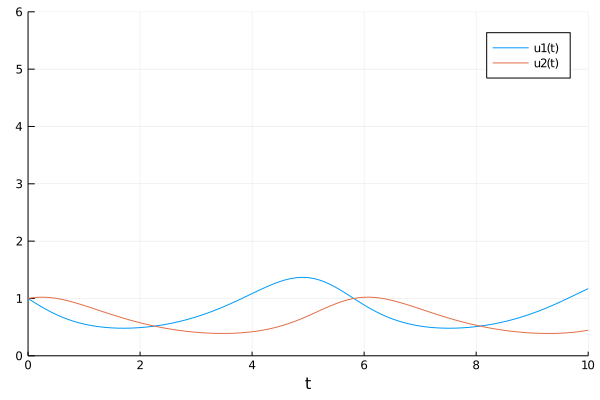

13.74036773176016

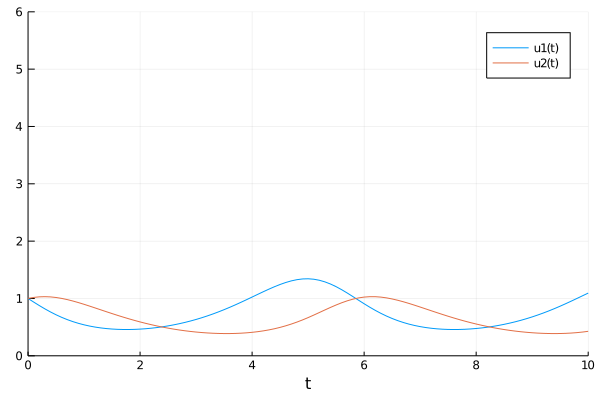

14.741857437218892

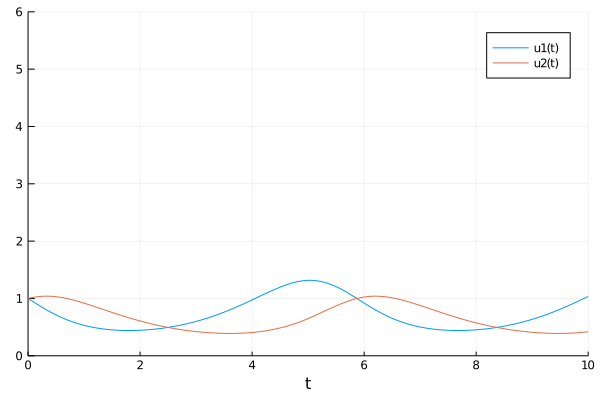

15.542479618156477

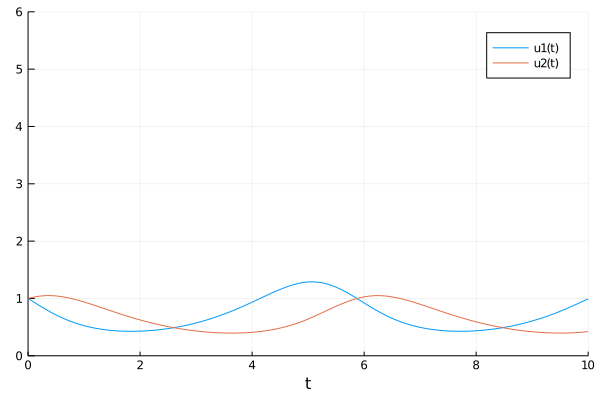

16.14923530188433

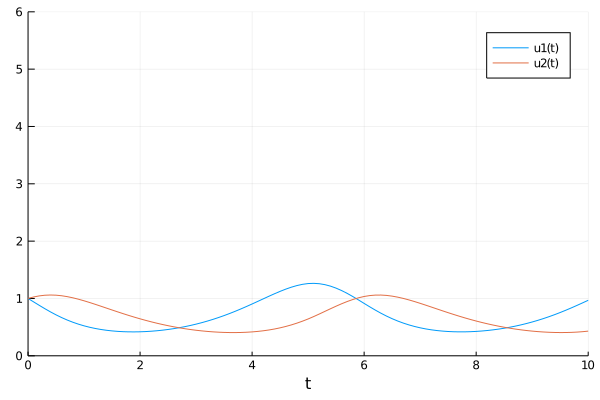

16.573530429198225

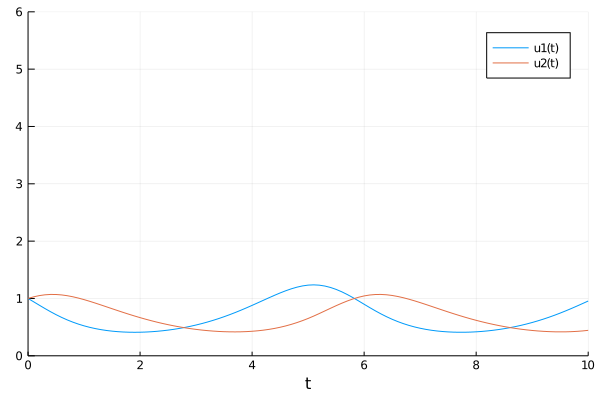

16.83175350787866

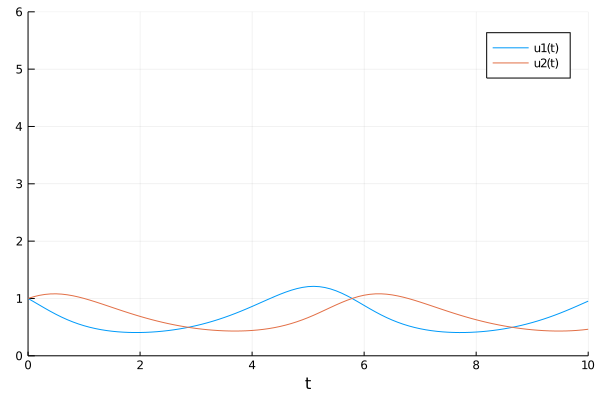

16.93788897117

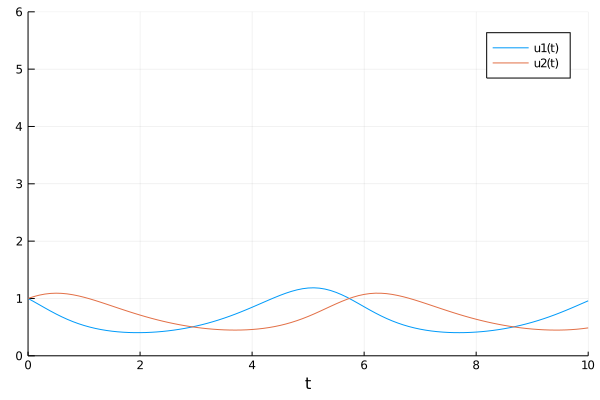

16.91753645884825

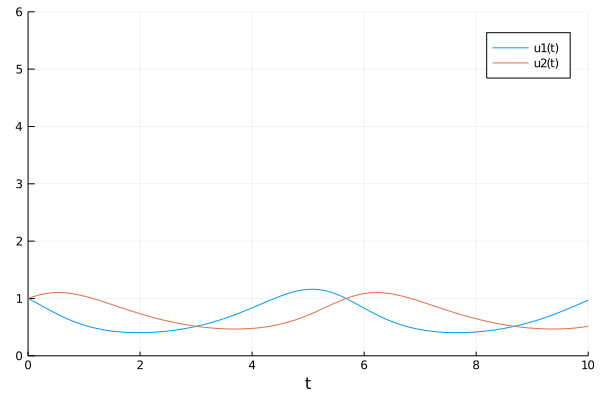

16.796109317800298

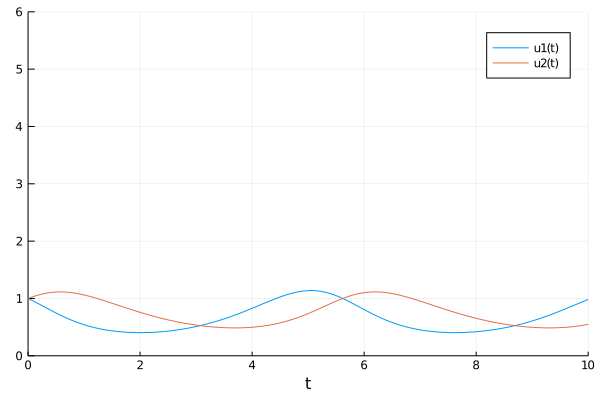

16.595699184887774

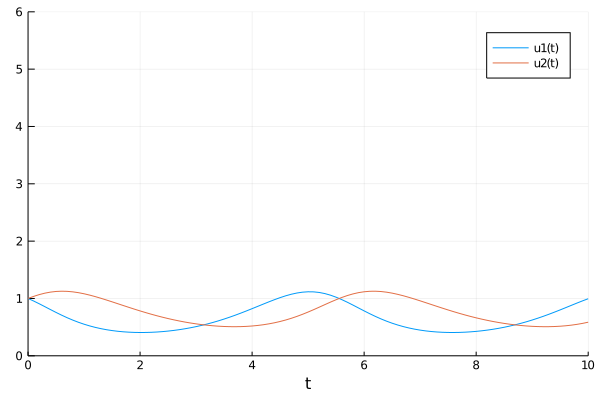

16.336534042711836

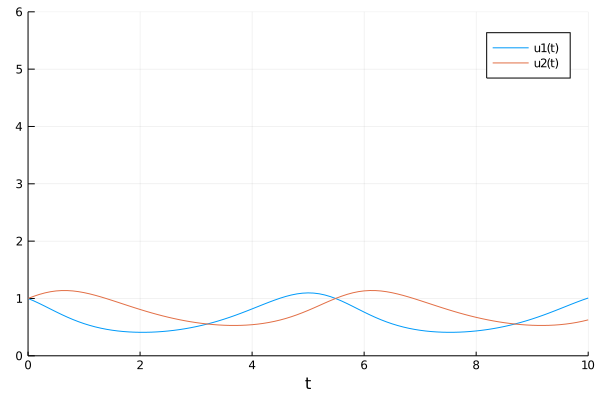

16.03125851305277

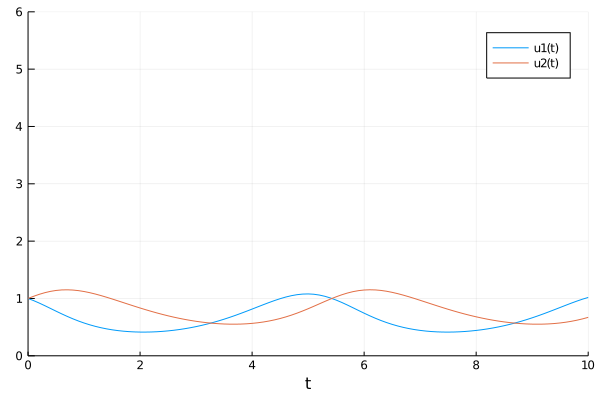

15.689289399454236

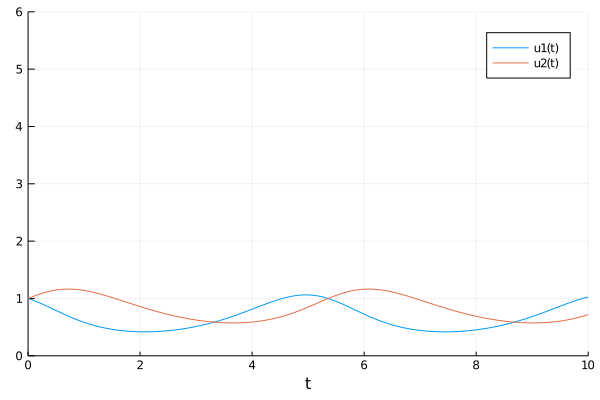

15.324602234556131

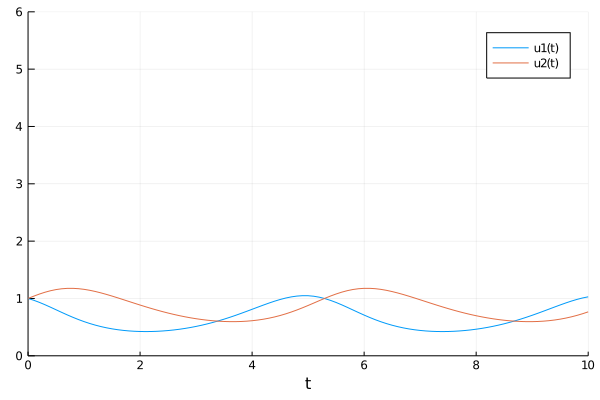

14.955105071321002

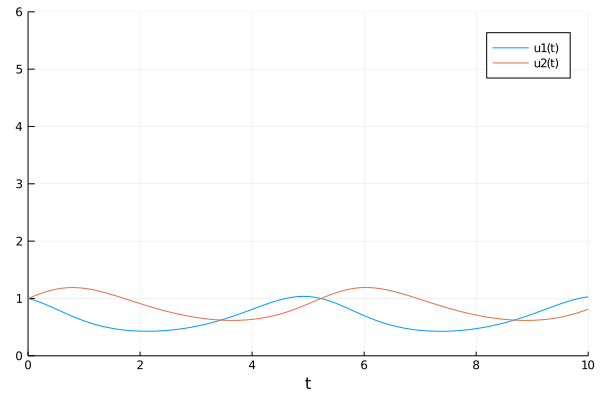

14.56753468471993

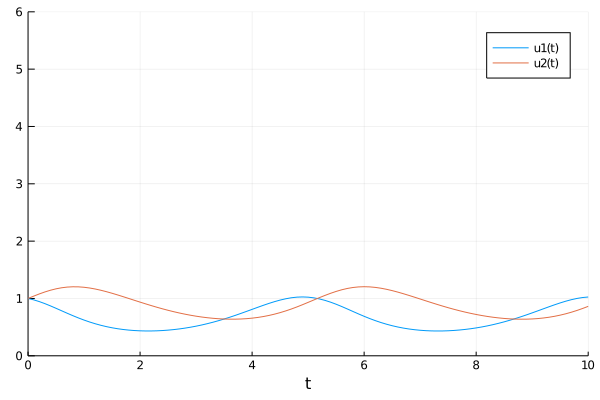

14.177085494417538

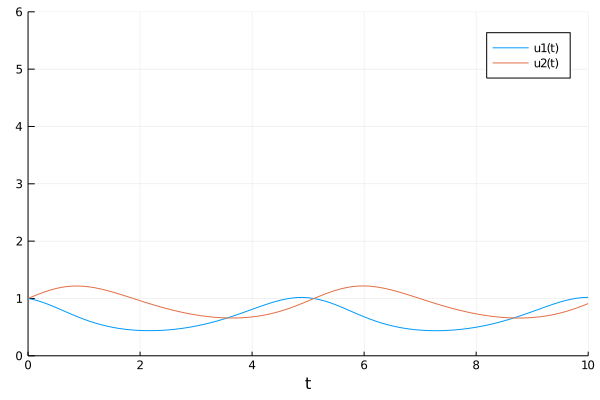

13.785752905426515

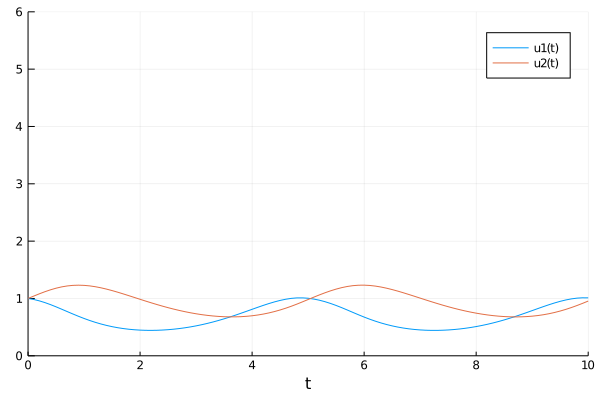

13.3965828622492

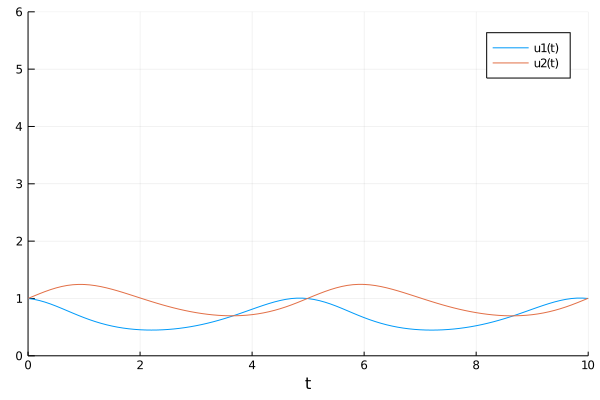

13.009279953266276

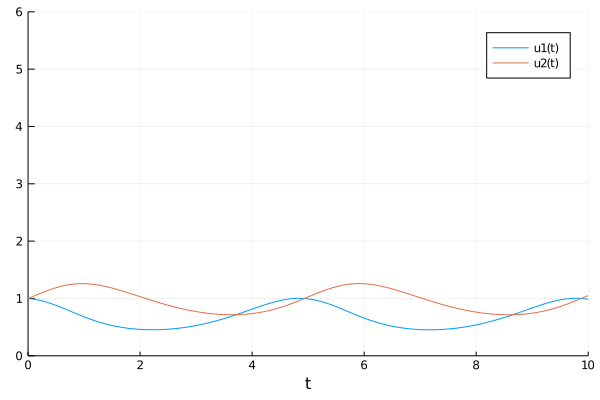

12.625456078243166

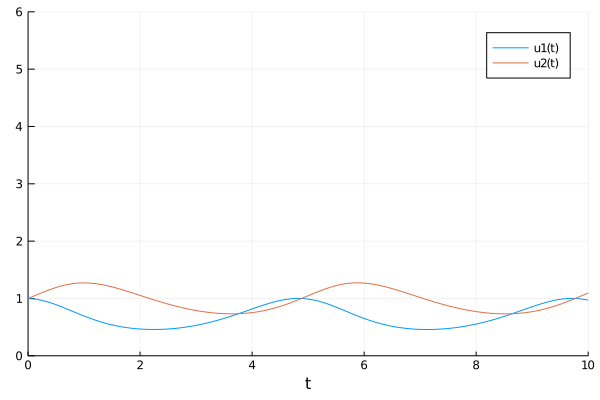

12.248547101000772

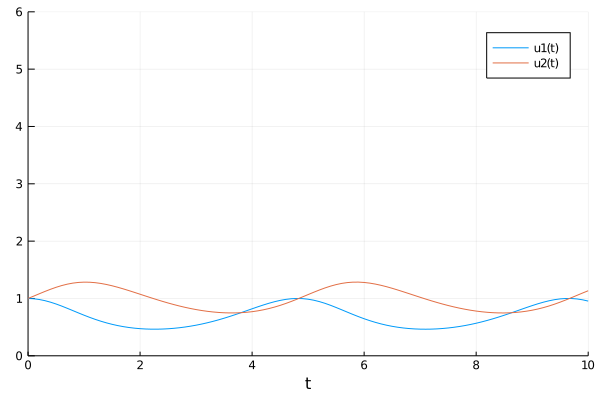

11.879083837358909

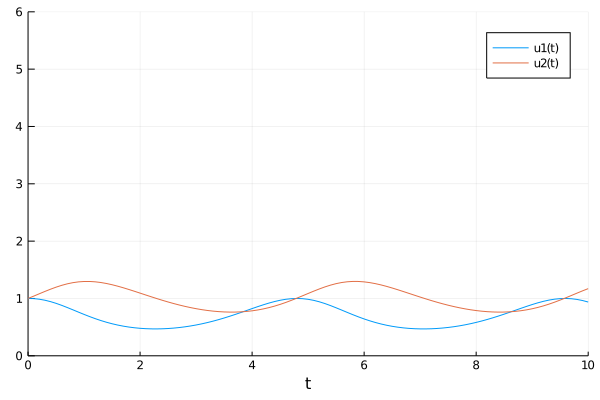

11.516854559593718

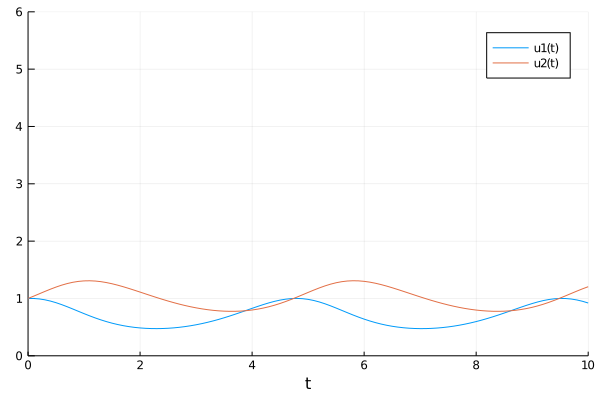

11.16162489831103

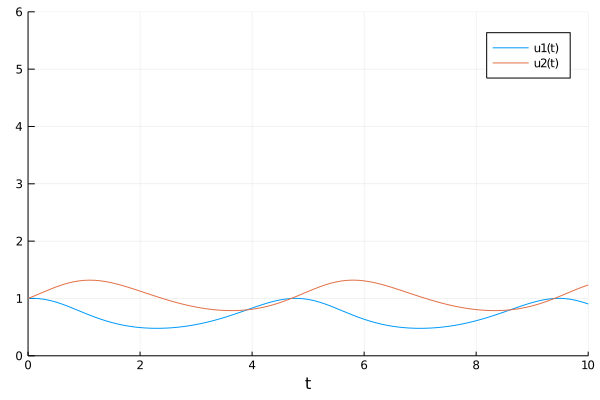

10.813116648638305

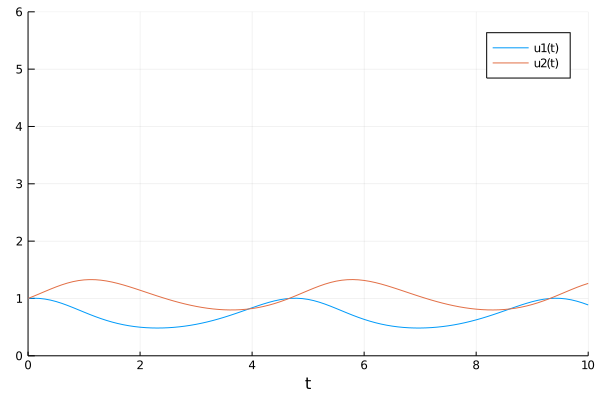

10.470986498472199

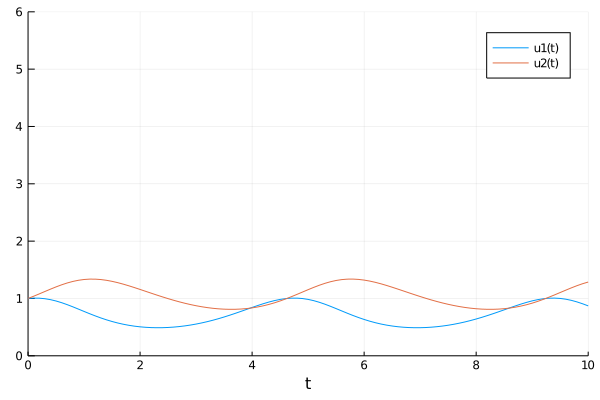

10.134834723305751

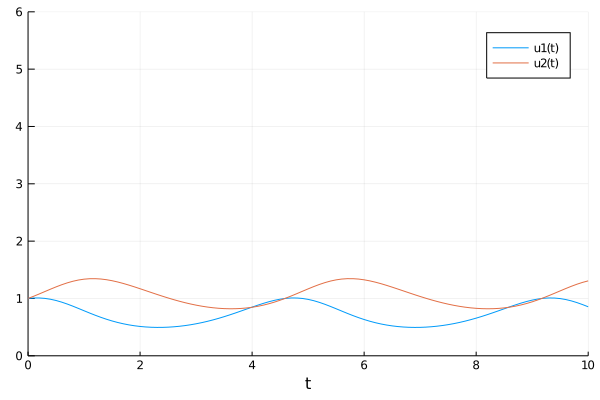

9.804210046131356

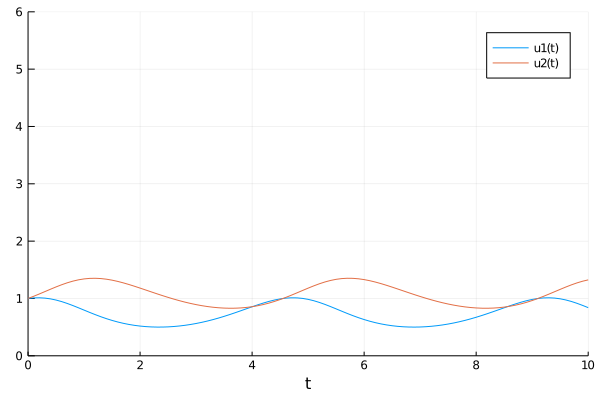

9.478632293266427

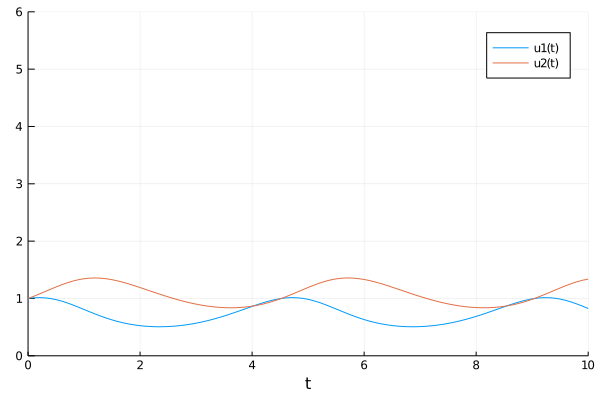

9.15761247723551

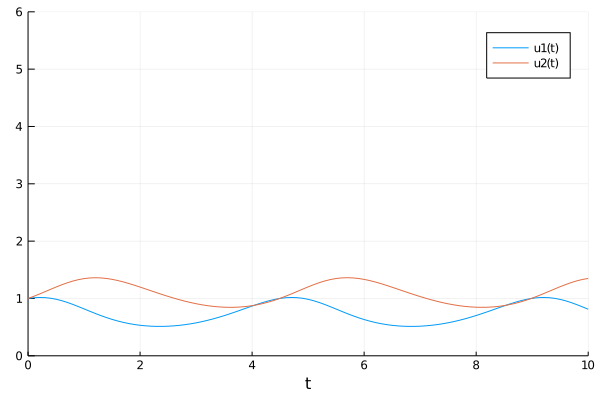

8.840672871291684

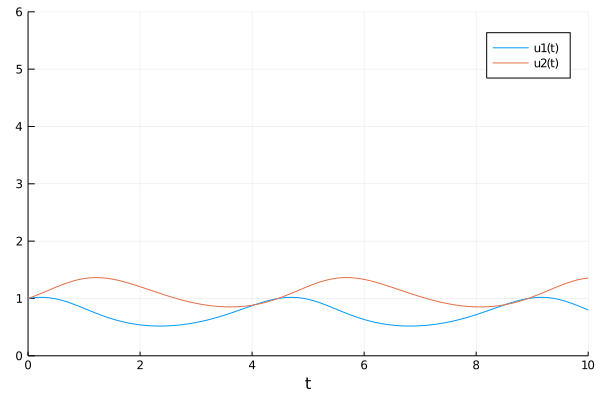

8.527366685735585

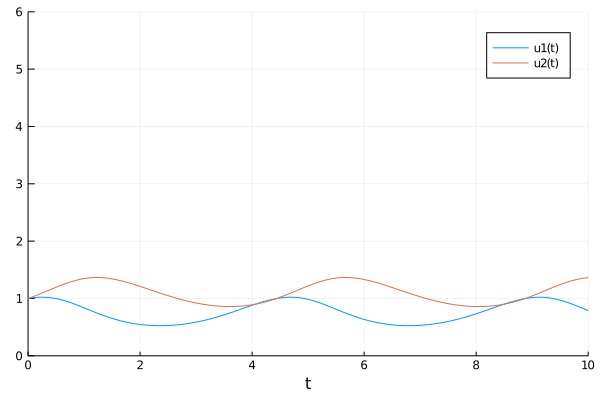

8.21728945801918

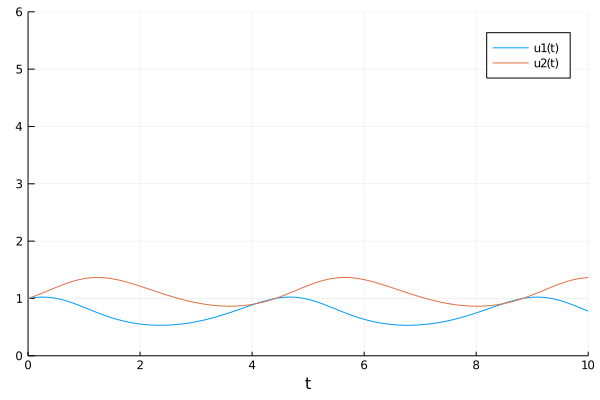

7.910087223244643

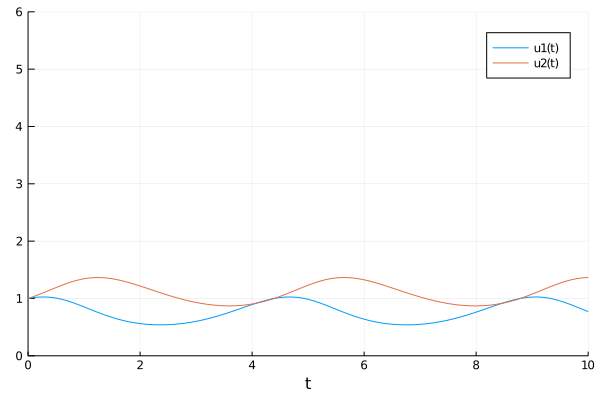

7.605458127680777

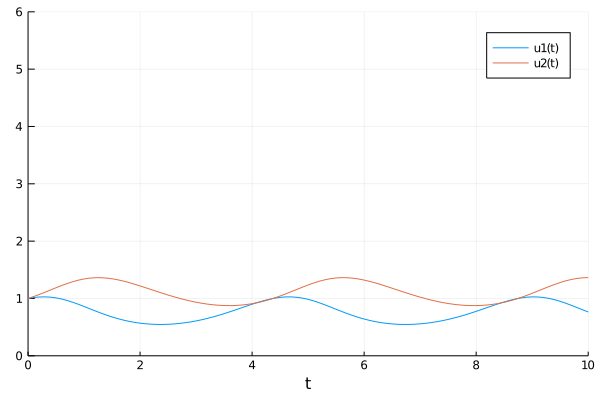

7.303133564268923

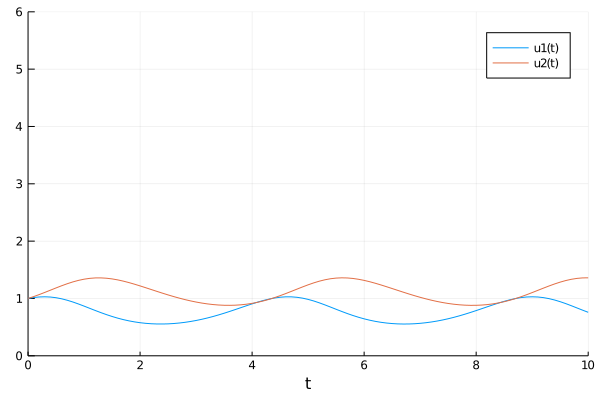

7.002810817991865

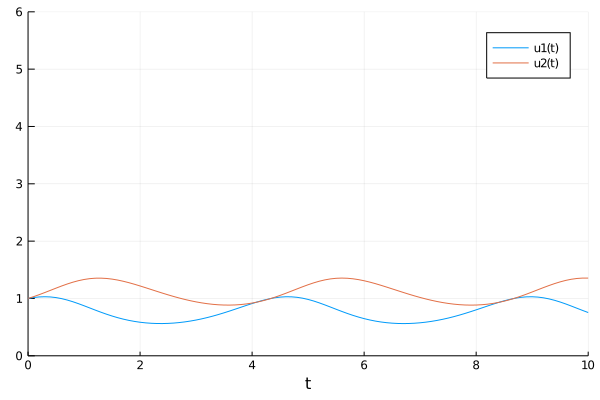

6.704087049647847

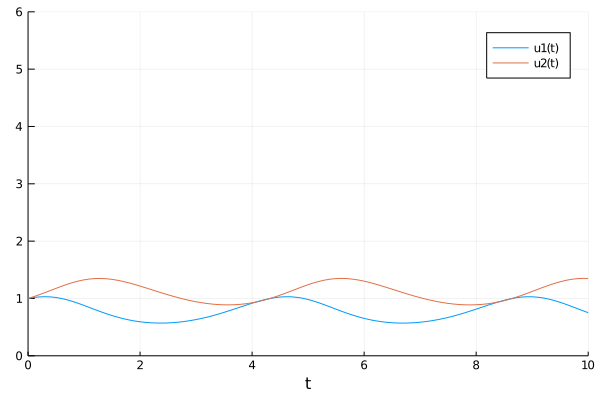

6.416125375760679

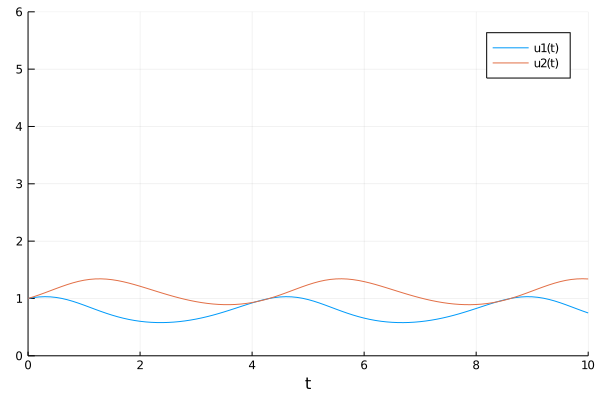

6.127334780641876

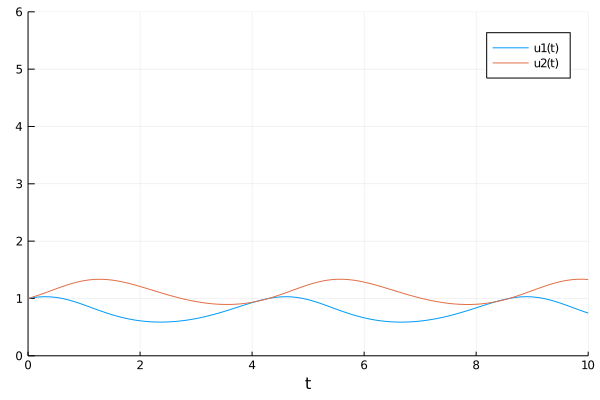

5.840198217660577

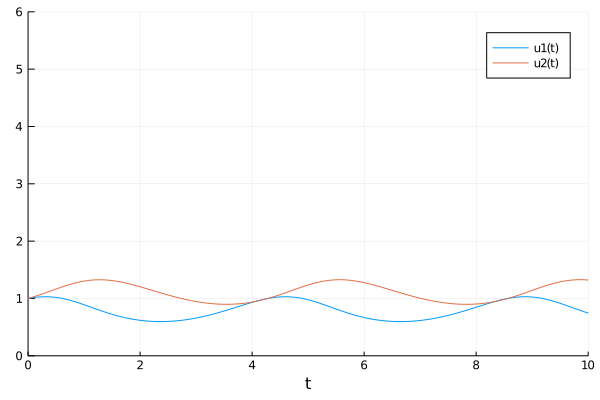

5.561465818782257

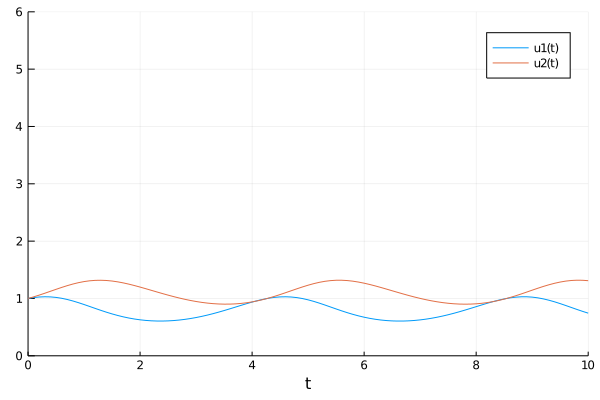

5.286468160560784

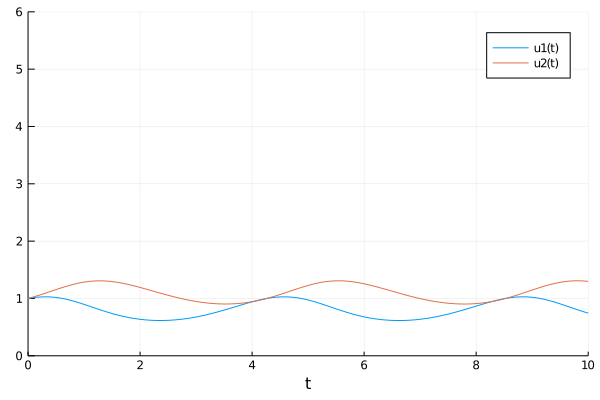

5.016471848032999

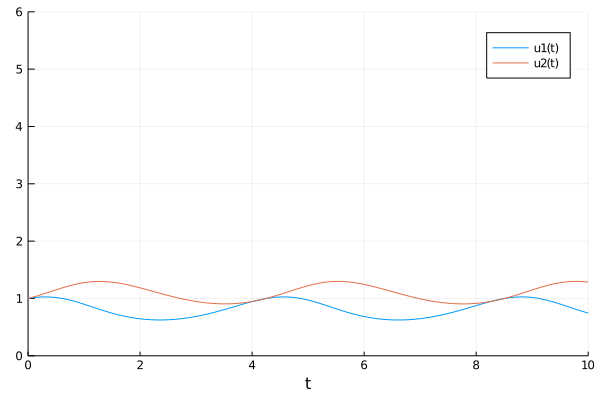

4.752388707919108

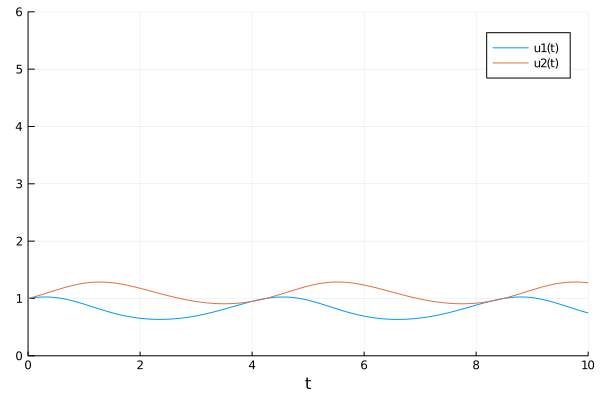

4.494872374686945

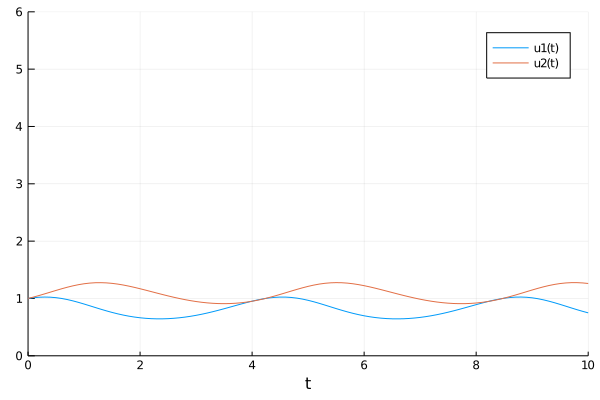

4.244461112022471

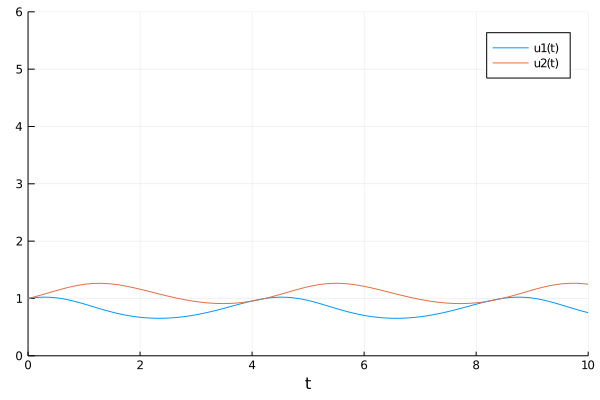

4.001572830234795

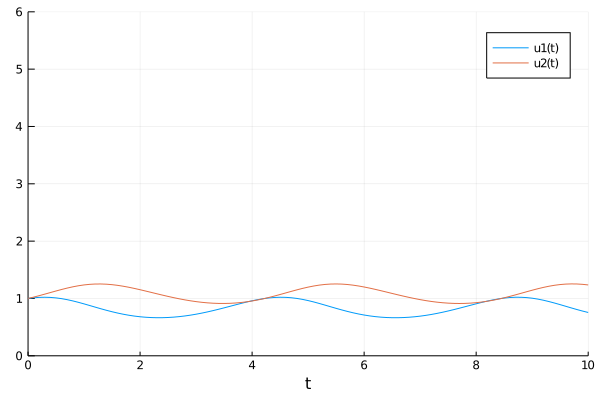

3.7664472965320765

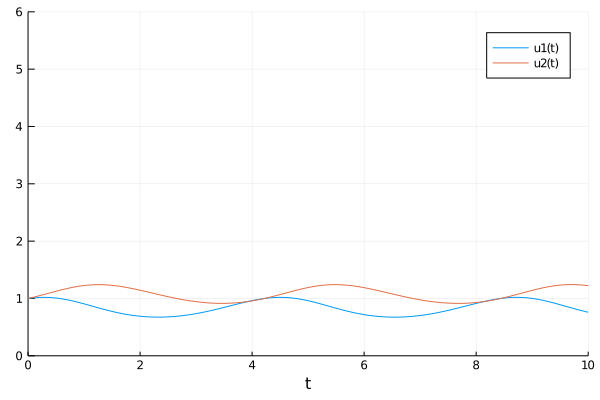

3.5397991679724043

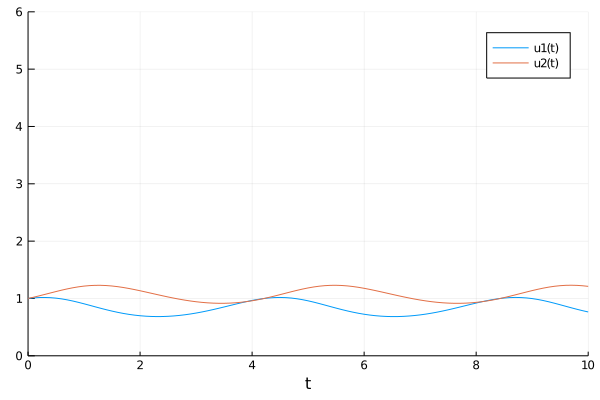

3.323102926067936

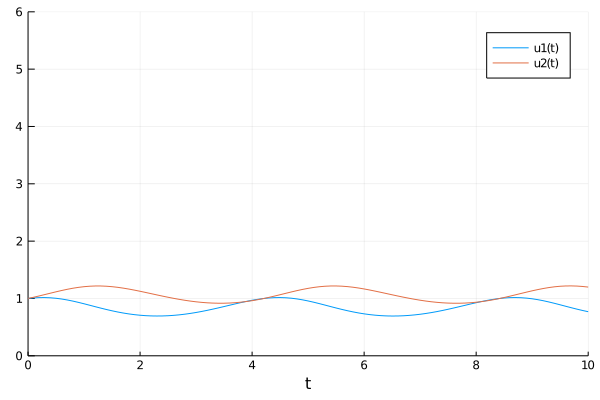

3.117106670242795

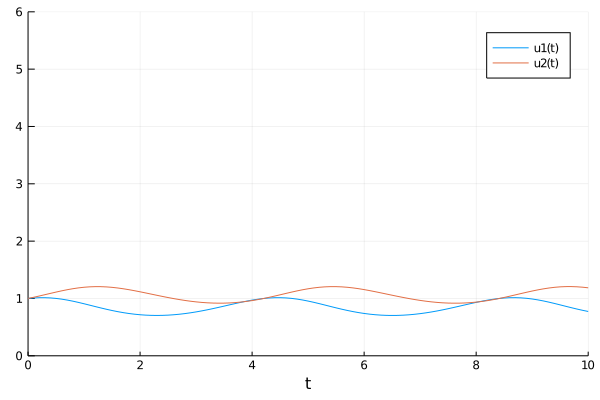

2.9206491401319608

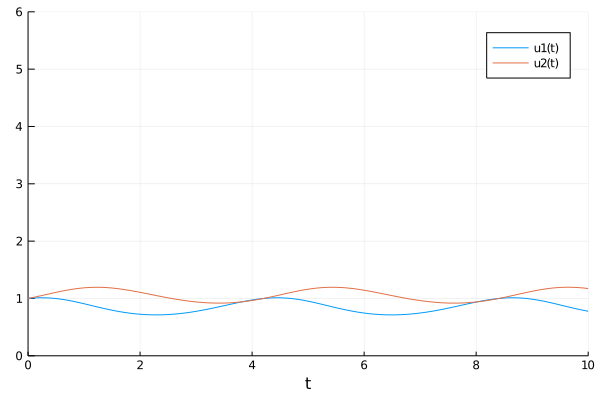

2.7333582924161326

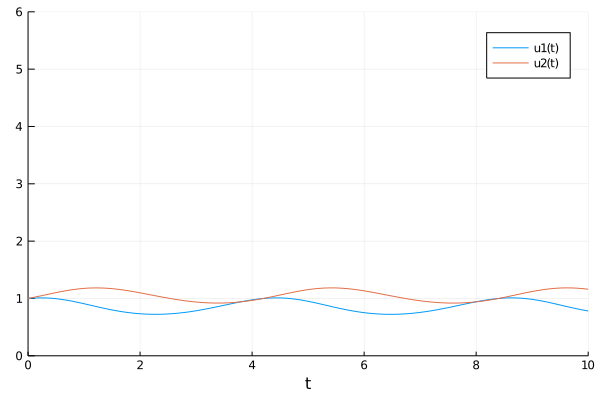

2.555279717493101

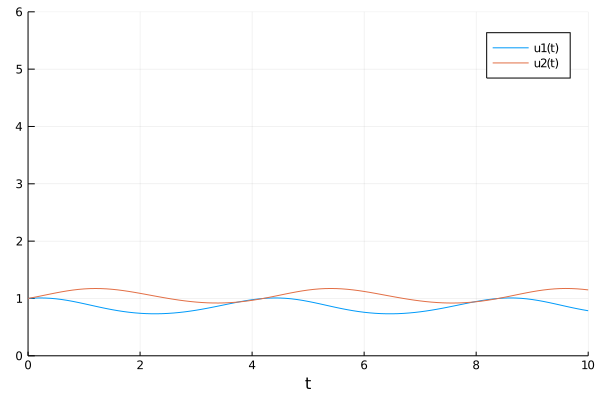

2.386239685771274

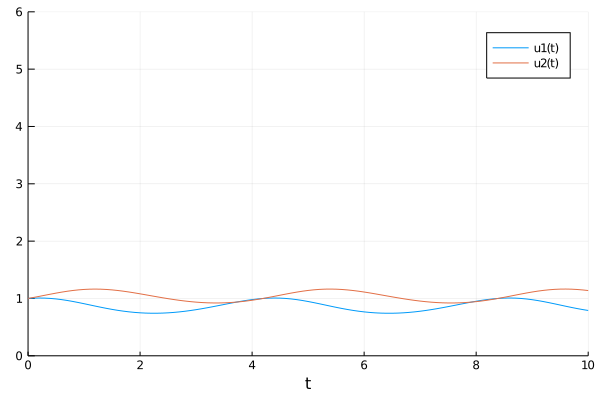

2.22599428748571

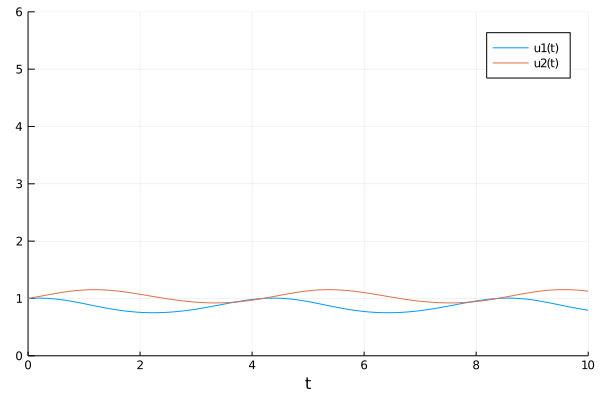

2.074324462288385

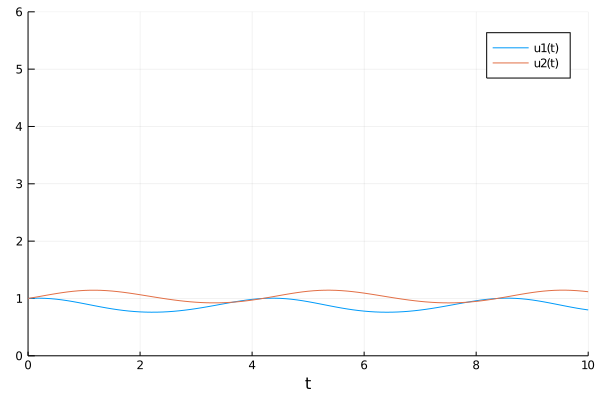

1.9310437906310576

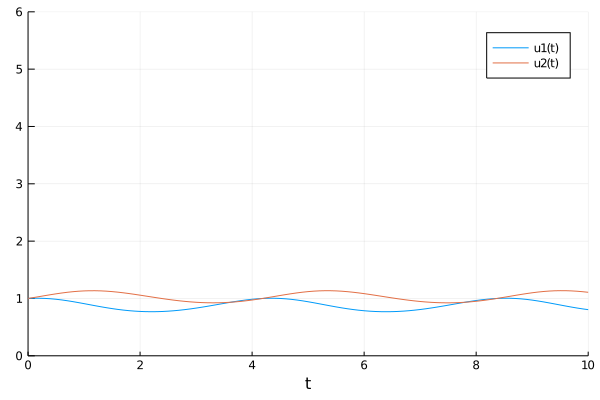

1.7960145413593678

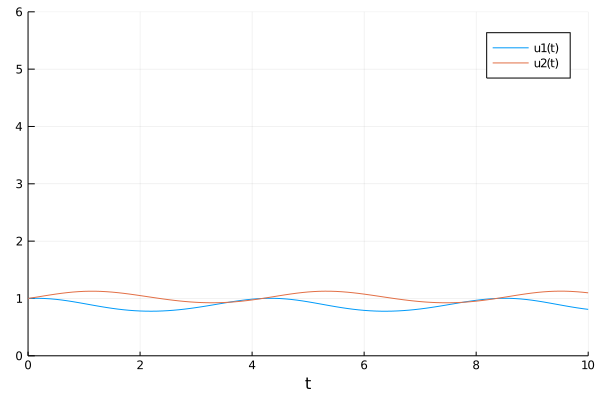

1.6690666552529232

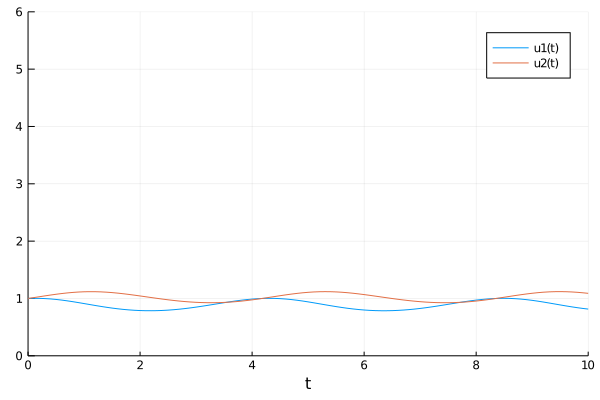

1.5500784118339057

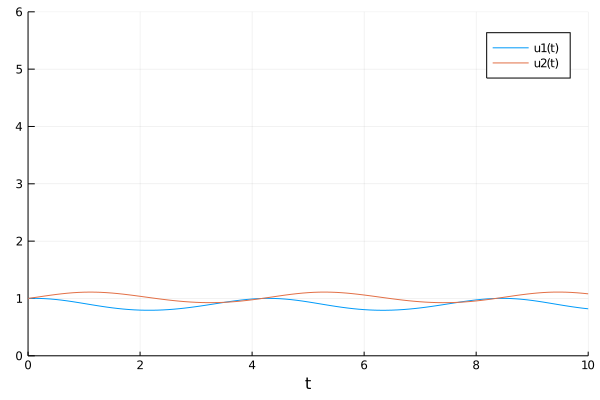

1.4382747728363283

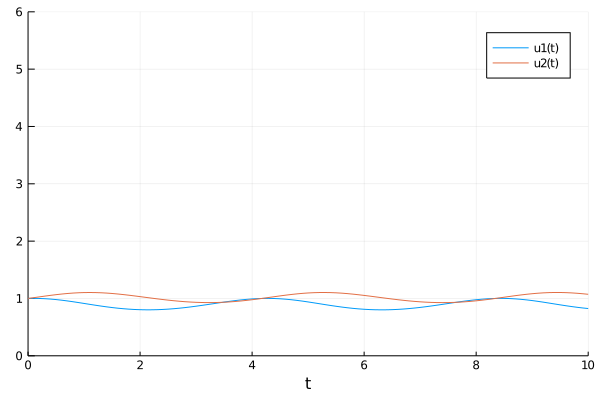

1.3329514825903441

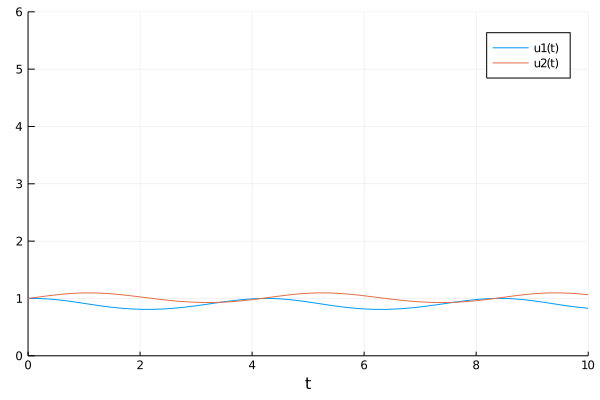

1.2336190274358028

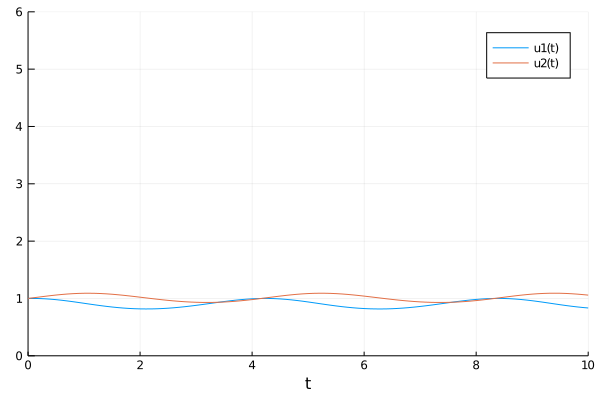

1.139969238622944

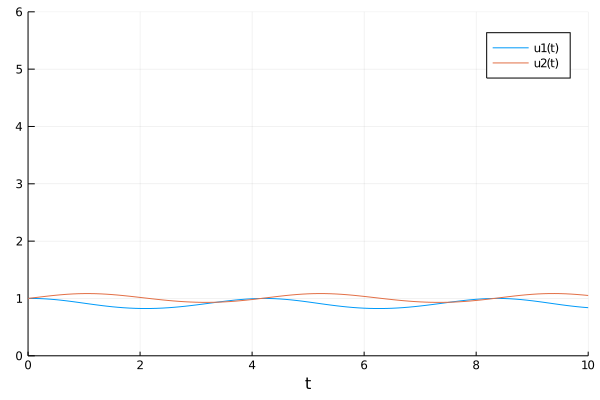

1.0517654427023928

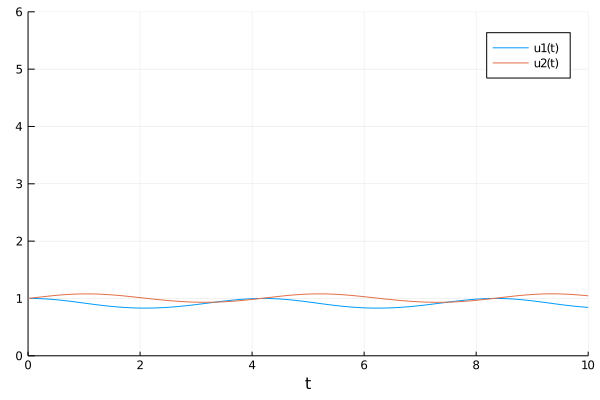

0.968773753971326

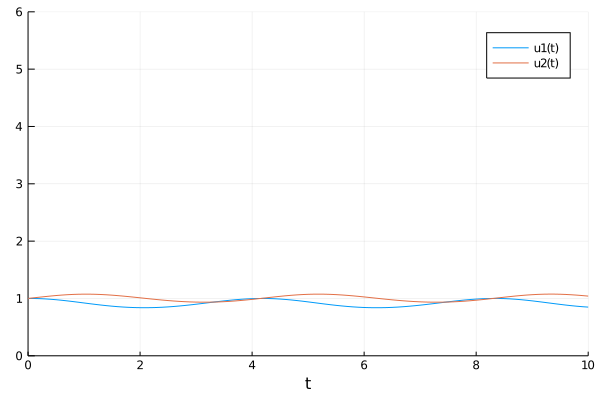

0.8907578252936831

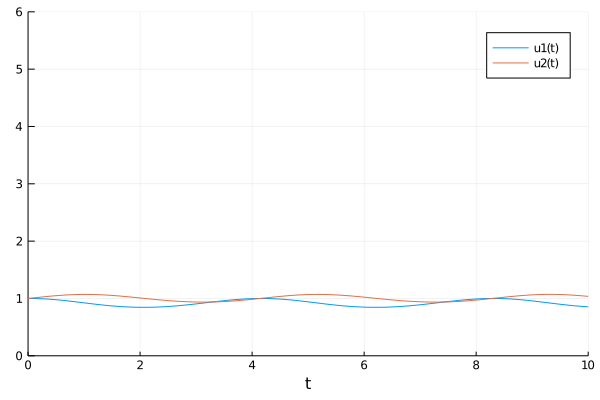

0.8175039397035284

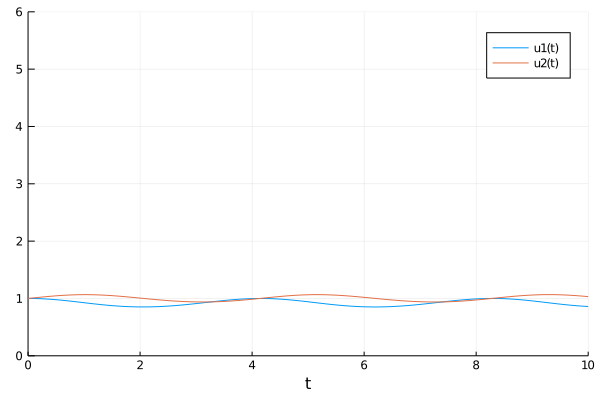

0.7487785769919298

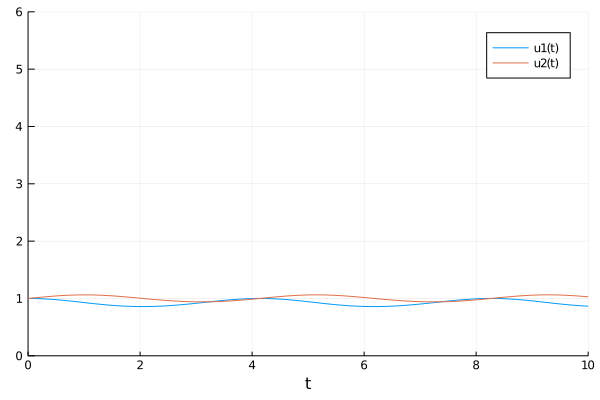

0.6843574435076971

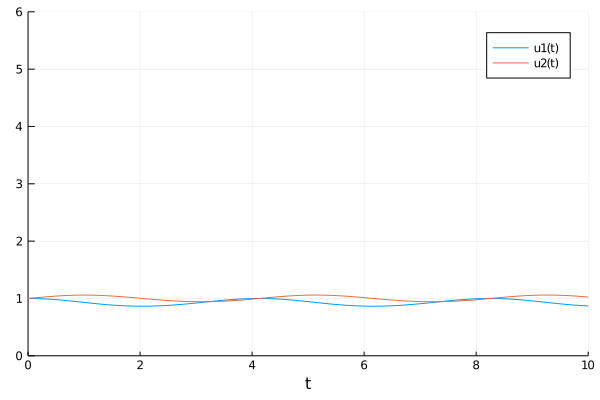

0.6240721976959488

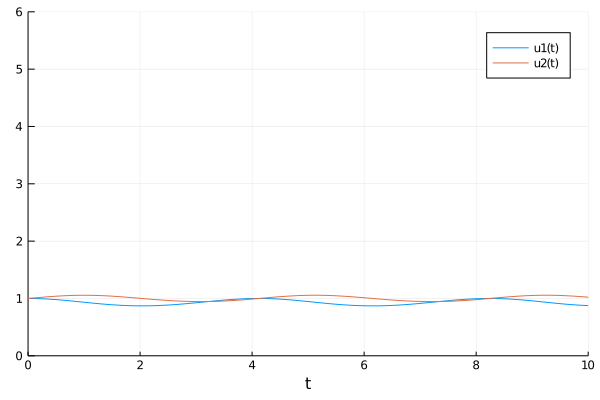

0.5676855929729102

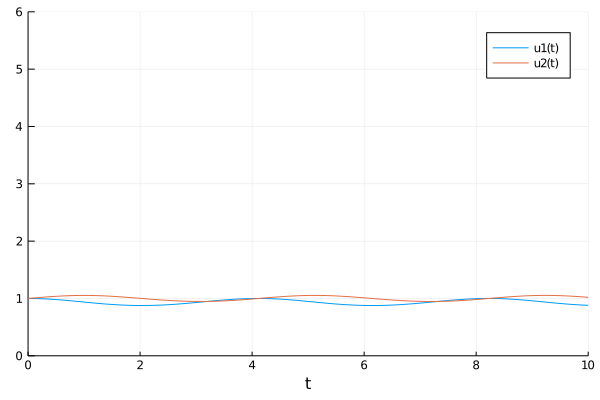

0.5150105481403007

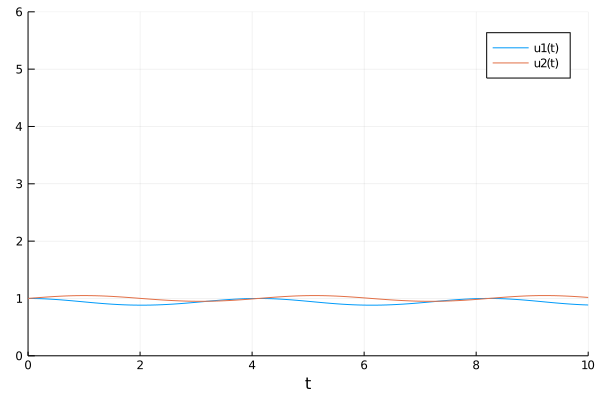

0.4658947933378741

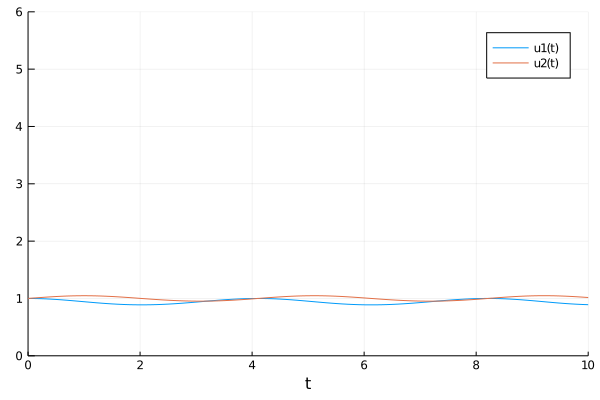

0.42021373103652343

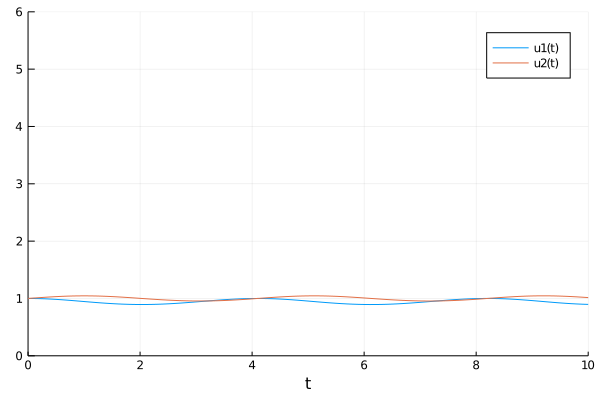

0.37785975907745156

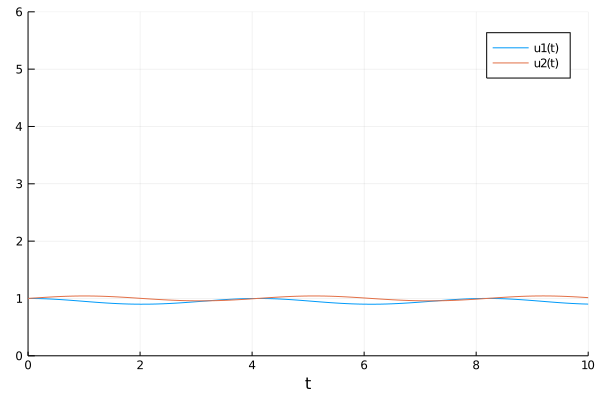

0.338732446598567

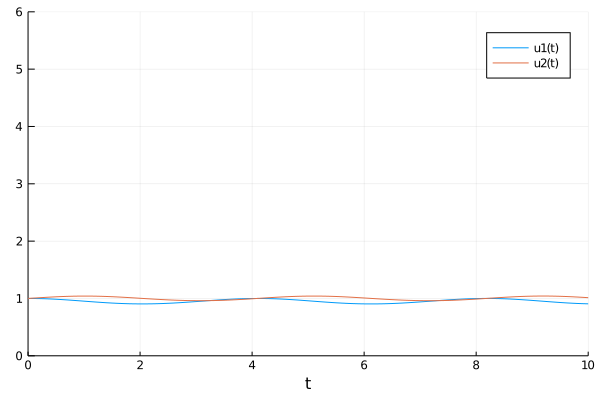

0.30273036724373303

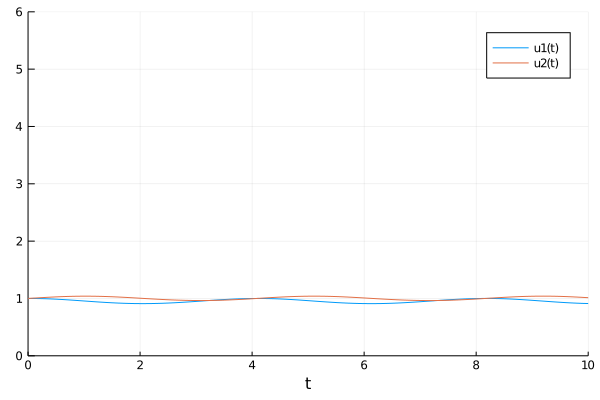

0.2697409597341973

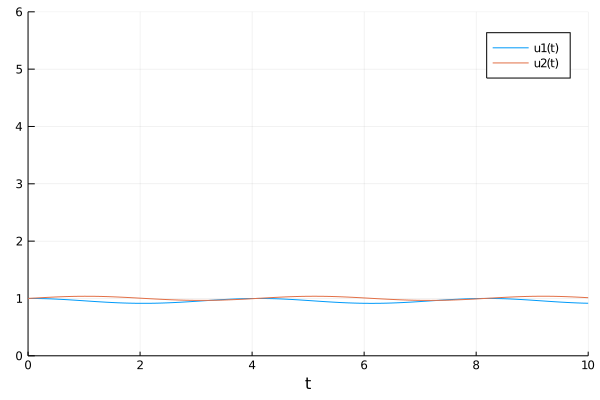

In [22]:
Flux.train!(loss_rd, params, data, opt, cb = cb)

In [23]:
m = Chain(
  Conv((2,2), 1=>16, relu),
  x -> maxpool(x, (2,2)),
  Conv((2,2), 16=>8, relu),
  x -> maxpool(x, (2,2)),
  x -> reshape(x, :, size(x, 4)),
  x -> concrete_solve(prob,Tsit5(),x,p,saveat=0.1)[1,:],
  Dense(288, 10), softmax) |> gpu

CUDAdrv.CuError: CUDA error (code 999, CUDA_ERROR_UNKNOWN)